# Preprocess

## Imports

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

import matplotlib.colors
from IPython.display import clear_output

In [16]:
from Dude import PATH,rp , tp, stp, sp ,features, create_network_data, pre_network

In [3]:
%load_ext autoreload
%autoreload 2
clear_output()

# Workspace

In [4]:
table = pd.merge( 
                pd.read_csv(f"{PATH}{tp}.txt", low_memory=False)  ,
                pd.read_csv(f"{PATH}{stp}.txt", low_memory=False) ,
                on = "trip_id"
                ).loc[:,features]

In [5]:
rids = table.route_id.unique()
sids = table.stop_id.unique()

In [6]:
print(
    f"""
    Number of identical routes: {rids.size}
    Number of identical stops: {sids.size}
    """
)


    Number of identical routes: 353
    Number of identical stops: 5388
    


In [7]:
routes_with_stops = table.set_index(["route_id","stop_id"])

In [8]:
print(f"The stops in route id : {rids[0]}")
routes_with_stops.loc[rids[0],slice(None)]

The stops in route id : 0078


,stop_sequence,direction_id
stop_id,,
008569,0,0
F03291,1,0
F03403,2,0
F03402,3,0
F03400,4,0
...,...,...
F03201,24,0
F03209,25,0
F03154,26,0


# Visualization

In [10]:
snames = pd.read_csv(f"{PATH}{sp}.txt")
gdata = create_network_data(table,snames)
gdata['positions'] = list(zip(gdata.stop_lat, gdata.stop_lon))
pos = gdata.loc[:,["stop_name","positions"]].set_index("stop_name").positions.to_dict()

In [48]:
df = pre_network(table,gdata)
tmp = pd.merge(pd.read_csv(f"{PATH}{rp}.txt").loc[:,["route_color","route_id"]],table,on="route_id")


In [49]:
colordict = {"009FE3":"cyan","FFD800":"yellow","E41F18":"red","005CA5":"blue","4CA22F":"dark green"}
change_color = lambda x : matplotlib.colors.hex2color(f"#{x}")
tmp.route_color = tmp.route_color.map(change_color)

In [20]:
G2 = nx.from_pandas_edgelist(df)

In [52]:
posdict = gdata.loc[:,["stop_name","stop_count"]].set_index("stop_name").to_dict()["stop_count"]
colordict = tmp.loc[:,["stop_name","route_color"]].set_index("stop_name").to_dict()["route_color"]
nsizes = np.array([posdict[n] for n in G2.nodes])
colors = [colordict[n] for n in G2.nodes]

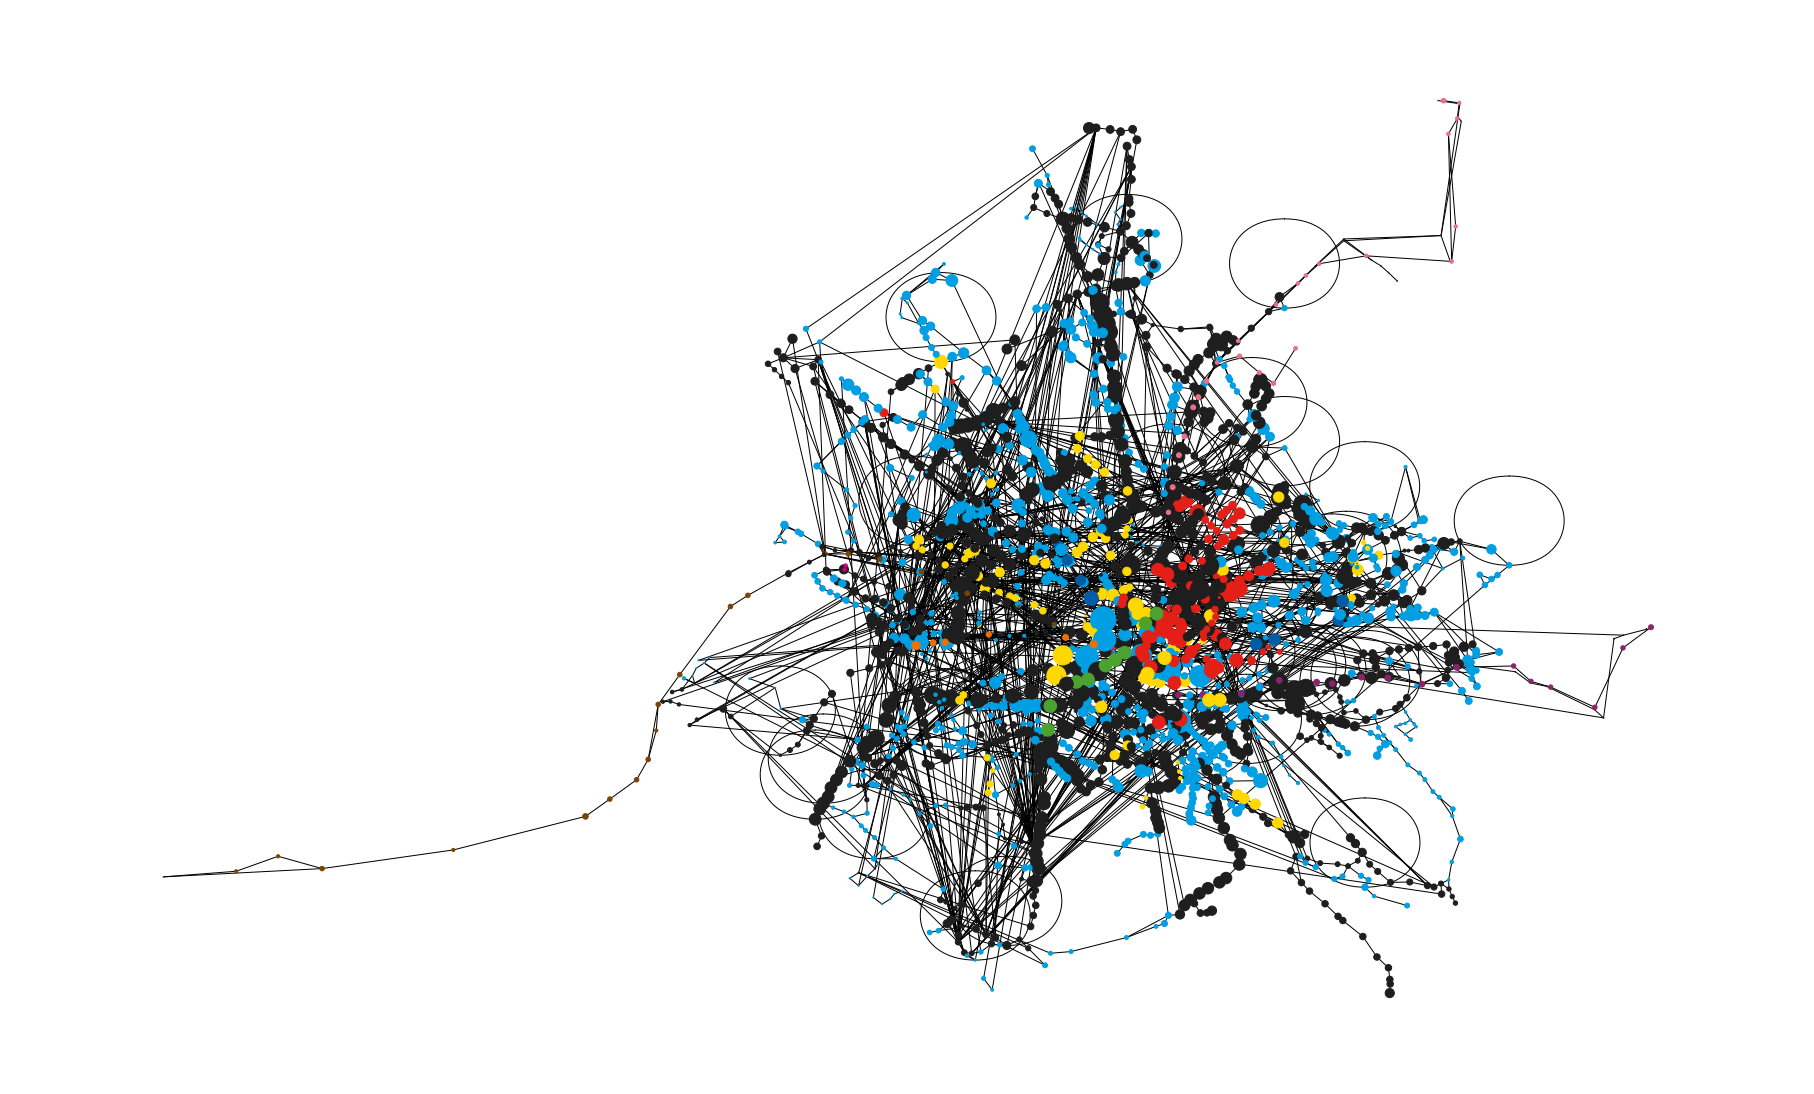

In [54]:
plt.figure(figsize = (25,15))
nx.draw(
        G2,
        pos = pos
        ,node_size =nsizes/10
        ,node_color = colors
)